# Retail Pharmacy Call Center Analyses using Poisson Distribution

In [175]:
import pandas as pd
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt

### Load the dataset

In [158]:
df = pd.read_csv('retail_pharmacy_call_center_dataset.csv')

# First 5 rows
df.head()

,Year,Incoming Calls,Answered Calls,Abandoned Calls,Answer Speed (AVG),Talk Duration (AVG),Waiting Time (AVG),Service Level (20 Seconds) AVG
0,2017,217,204,13,0:00:17,0:02:14,0:02:45,0.7628
1,2017,200,182,18,0:00:20,0:02:22,0:06:55,0.7273
2,2017,216,198,18,0:00:18,0:02:38,0:03:50,0.7430
3,2017,155,145,10,0:00:15,0:02:29,0:03:12,0.7961
4,2017,37,37,0,0:00:03,0:02:06,0:00:35,0.9730


# Data Assessment:

### a) Types of Data:

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1251 entries, 0 to 1250
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Year                            1251 non-null   int64  
 1   Incoming Calls                  1251 non-null   int64  
 2   Answered Calls                  1251 non-null   int64  
 3   Abandoned Calls                 1251 non-null   int64  
 4   Answer Speed (AVG)              1251 non-null   object 
 5   Talk Duration (AVG)             1251 non-null   object 
 6   Waiting Time (AVG)              1251 non-null   object 
 7   Service Level (20 Seconds) AVG  1251 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 78.3+ KB


### b) Column Names:

In [160]:
list(df)

['Year',
 'Incoming Calls',
 'Answered Calls',
 'Abandoned Calls',
 'Answer Speed (AVG)',
 'Talk Duration (AVG)',
 'Waiting Time (AVG)',
 'Service Level (20 Seconds) AVG']

### c) Total Number of Rows:

In [161]:
len(df)

1251

### d) Checking for total number of missing Values:

In [174]:
df.isnull().sum()

Year                              0
Incoming Calls                    0
Answered Calls                    0
Abandoned Calls                   0
Answer Speed (AVG)                0
Talk Duration (AVG)               0
Waiting Time (AVG)                0
Service Level (20 Seconds) AVG    0
dtype: int64

### e) Checking for total number of duplicate rows:

In [163]:
df.duplicated().sum()

0

# Analyzing Data Using Poisson Distribution

#### Explanation:
#### The `Poisson distribution` is suitable for modeling the number of events occurring within a fixed time interval. Given that the data includes yearly metrics, we can use the Poisson distribution to analyze the number of incoming calls, answered calls,and potentially other metrics.

## Questions 1: What is the average number of incoming calls?

#### Note: Mean of `Incoming Calls` to be used as λ (rate) for Poisson distribution

In [164]:
avg_incoming_calls = df['Incoming Calls'].mean()
print(f'Average Incoming Calls: {avg_incoming_calls:.2f}')

Average Incoming Calls: 198.54


### Generating a Poisson distribution using the Average and compare it with the actual data.

In [165]:
poisson_dist = poisson.pmf(np.arange(0, df['Incoming Calls'].max()), avg_incoming_calls)
poisson_dist

array([5.96157522e-87, 1.18360857e-84, 1.17496567e-82, ...,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

## Plot the distribution

### Plot actual data vs Poisson distribution:

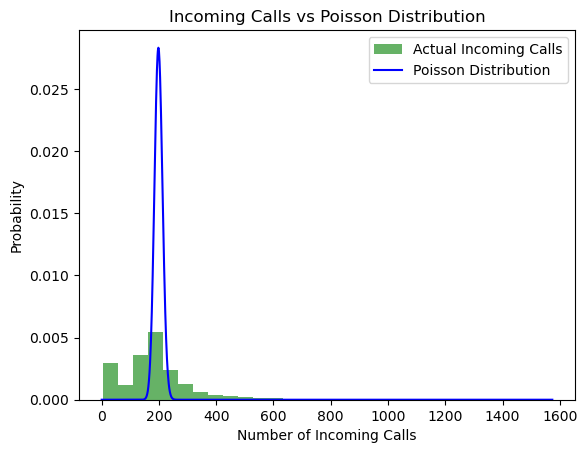

In [166]:
plt.hist(df['Incoming Calls'], bins=30, density=True, alpha=0.6, color='g', label='Actual Incoming Calls')
plt.plot(np.arange(0, df['Incoming Calls'].max()), poisson_dist, 'b-', label='Poisson Distribution')
plt.title('Incoming Calls vs Poisson Distribution')
plt.xlabel('Number of Incoming Calls')
plt.ylabel('Probability')
plt.legend()
plt.show()

### Interpretation:
#### The graph you provided compares the actual distribution of `incoming calls` to a theoretical Poisson distribution.
#### a) Incoming Calls: The shape of the histogram reveals that the distribution is skewed to the right, with a few days having significantly higher call volumes than most.
#### b) Poisson Distribution: The blue line represents the theoretical Poisson distribution, fitted to the data using the average number of incoming calls. It provides a probability distribution based on the assumption that incoming calls occur randomly and independently at a constant rate.
#### c) The observed distribution has a heavier tail on the right side compared to the Poisson distribution. This suggests that there might be additional factors influencing the incoming calls beyond a purely random Poisson process.

#### Possible Explanations:
#### Day-to-day variation: The number of incoming calls might not be strictly constant over time, leading to deviations from the Poisson distribution.
#### Seasonal effects: Certain times of the year might have consistently higher or lower call volumes. 
#### External factors: Events or promotions could influence the number of incoming calls.

### Question 2: What is the probability of receiving a certain number of calls in a year?

In [167]:
# Probability of receiving exactly 1000 calls in a Year
calls = 1000
probability_2000_calls = poisson.pmf(calls, avg_incoming_calls)
print(f'The probability of receiving exactly {calls} calls in a year: {probability_2000_calls}')

The probability of receiving exactly 1000 calls in a year: 0.0


### Question 3: What is the probability of receiving more than 1500 calls in a year?

In [169]:
calls = 1500
probability_more_than_2500 = 1 - poisson.cdf(calls, avg_incoming_calls)
print(f'The probability of receiving more than {calls} calls in a year: {probability_more_than_2500}')

The probability of receiving more than 1500 calls in a year: 0.0


### Question 4: Are the average `Incoming calls` correlated with the number of `Answered Calls`?

In [170]:
# Correlation between Incoming Calls and Answered Calls
correlation = df['Incoming Calls'].corr(df['Answered Calls'])
print(f'Correlation between Incoming Calls and Waiting Time (AVG): {correlation:.2f}')

Correlation between Incoming Calls and Waiting Time (AVG): 0.95


#### Explaning:
#### This indicates a strong positive correlation between `incoming calls` and `answered calls`. 
#### A correlation coefficient of `0.95` suggests that as the number of `incoming calls` increases, the number of `answered calls` also tends to increase in a similar proportion.

### Question 5: What is the `Service level` over time, and how does it relate to `Incoming calls`?

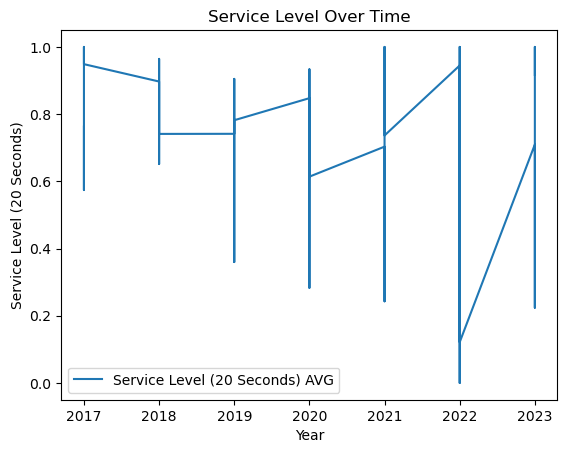

In [171]:
# Plot Service Level over time:
df.plot(x='Year', y='Service Level (20 Seconds) AVG', kind='line', title='Service Level Over Time')
plt.ylabel('Service Level (20 Seconds)')
plt.show()

### Explanation:
#### The plot shows the percentage of calls answered within 20 seconds. Here are the key observations:
#### Overall Trend: The service level fluctuates over the years. There is a general upward trend from 2017 to 2020, followed by a decline in 2021 and then an increase in 2022 and 2023.
#### 2017: The service level starts at a relatively high point.
#### 2018-2019: There is a slight decrease in the service level.
#### 2020: The service level drops significantly.
#### 2021: The service level remains low.
#### 2022-2023: There is a significant improvement in the service level, reaching its highest point in 2023.
#### Possible Explanations: Changes in staffing or resources, Seasonal variations, Operational changes (call center processes changes or new policies)

### Further Analysis: Correlate `Incoming Calls` and `Service Level`, Solved Below:

### Correlation between `Incoming Calls` and `Service Level`:

In [172]:
# How service level (calls answered within 20 seconds) changes over time, especially as the number of incoming calls fluctuates.
service_level_correlation = df['Incoming Calls'].corr(df['Service Level (20 Seconds) AVG'])
print(f'Correlation between Incoming Calls and Service Level (20 Seconds): {service_level_correlation:.2f}')

Correlation between Incoming Calls and Service Level (20 Seconds): -0.49


### Explanation:
#### The correlation coefficient measures the strength and direction of the linear relationship between `Incoming Calls` and `Service level`.
#### a) This indicates a negative correlation between`incoming calls` and `service level`. A correlation coefficient of `-0.49` suggests that as the number of `incoming calls` increases, the `service level` tends to decrease. In other words, when there are more incoming calls, a lower percentage of calls are answered within 20 seconds.
#### b) This finding might imply that the call center is struggling to handle increased call volumes, leading to longer wait times and a decrease in service level.